<a href="https://www.kaggle.com/code/mikedelong/subplots-and-bar-charts?scriptVersionId=140194439" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
workbook = pd.ExcelFile('/kaggle/input/99bikes-sales-data/99Bikers_Raw_data.xlsx')
workbook.sheet_names

['Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']

We have four sheets in this workbook; let's start with the transactions because they involve money.

In [2]:
transaction_df = pd.read_excel(io=workbook, sheet_name=workbook.sheet_names[0], parse_dates=['transaction_date'], index_col=[0])
transaction_df['product_first_sold_date'] = pd.to_datetime(transaction_df['product_first_sold_date'], unit='D', origin='1899-12-30')
transaction_df['online_order'] = transaction_df['online_order'].astype(bool)
transaction_df.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [3]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   product_id               20000 non-null  int64         
 1   customer_id              20000 non-null  int64         
 2   transaction_date         20000 non-null  datetime64[ns]
 3   online_order             20000 non-null  bool          
 4   order_status             20000 non-null  object        
 5   brand                    19803 non-null  object        
 6   product_line             19803 non-null  object        
 7   product_class            19803 non-null  object        
 8   product_size             19803 non-null  object        
 9   list_price               20000 non-null  float64       
 10  standard_cost            19803 non-null  float64       
 11  product_first_sold_date  19803 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](2), f

In [4]:
transaction_df.nunique()

product_id                  101
customer_id                3494
transaction_date            364
online_order                  2
order_status                  2
brand                         6
product_line                  4
product_class                 3
product_size                  3
list_price                  296
standard_cost               103
product_first_sold_date     100
dtype: int64

We have categorical data with in six colums (ignoring IDs), so let's make some bar charts.

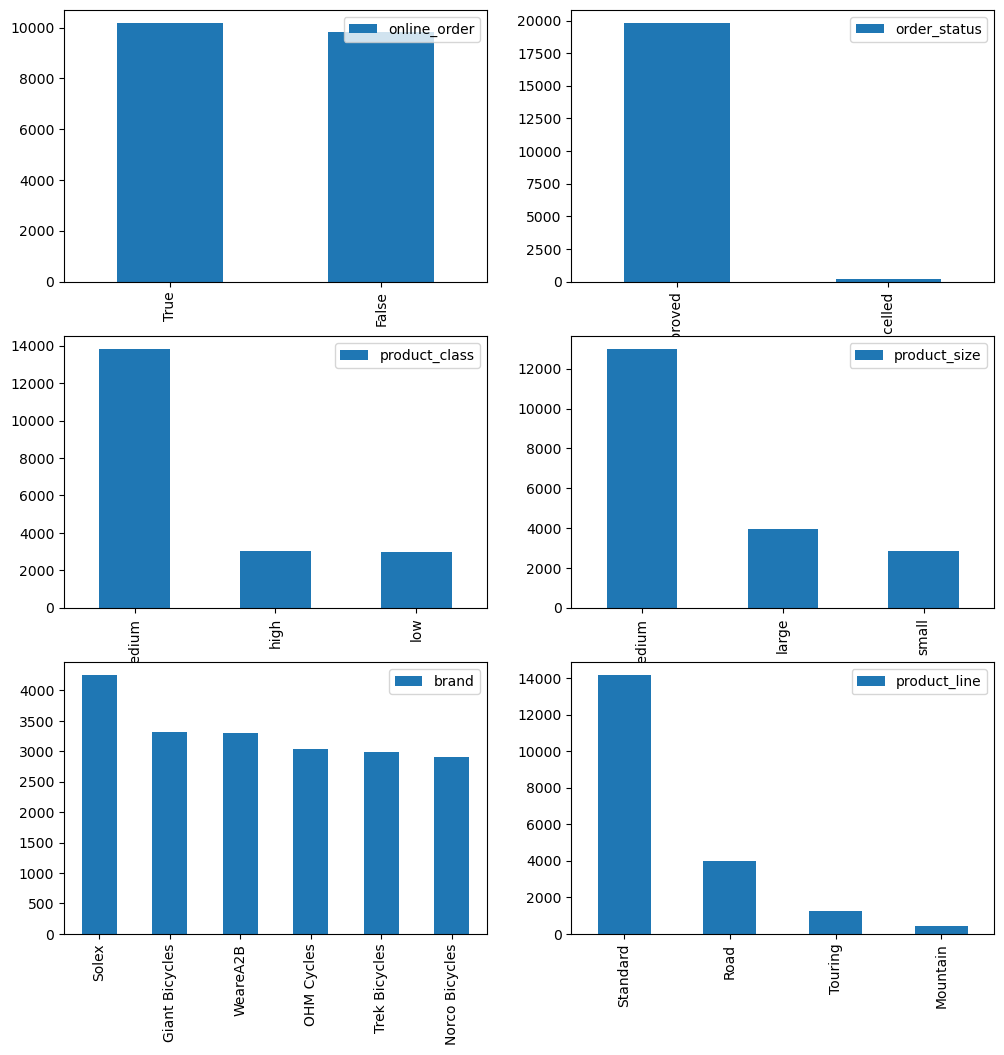

In [5]:
from matplotlib.pyplot import subplots
fig, ax = subplots(nrows=3, ncols=2, figsize=(12, 12))
for index, column in enumerate(['online_order', 'order_status', 'product_class', 'product_size', 'brand', 'product_line', ]):
    transaction_df[column].value_counts().plot( kind='bar', ax=ax.ravel()[index], legend=True)

We can represent all of these in a single chart reasonably well.

In [6]:
from plotly.express import treemap
brand_line = ['brand', 'product_line', 'product_class', 'product_size']
treemap(data_frame=transaction_df.groupby(by=brand_line).size().reset_index(), path=brand_line, values=0).show()

In [7]:
class_first = ['product_class', 'product_size', 'brand', 'product_line', ]
treemap(data_frame=transaction_df.groupby(by=class_first).size().reset_index(), path=class_first, values=0).show()

Let's add a column representing the spread between the price and our cost for the item sold.

<Axes: >

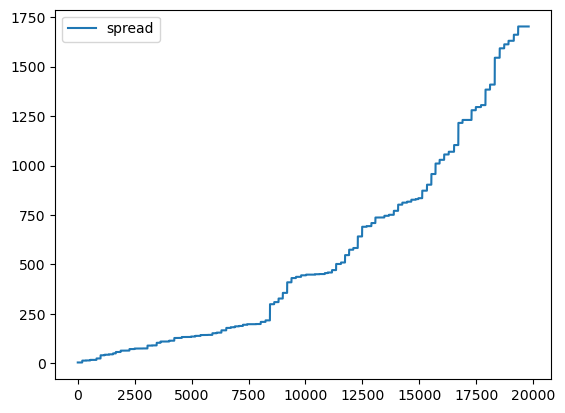

In [8]:
spread_df = transaction_df[transaction_df['standard_cost'].notnull()].copy()
spread_df['spread'] = spread_df['list_price']- spread_df['standard_cost'] 
spread_df.sort_values(by=['spread']).reset_index().plot(kind='line', y='spread', legend=True)

Our spread is always positive; let's break it down over our categorical variables.

Text(0.5, 0.98, 'Spread breakdown')

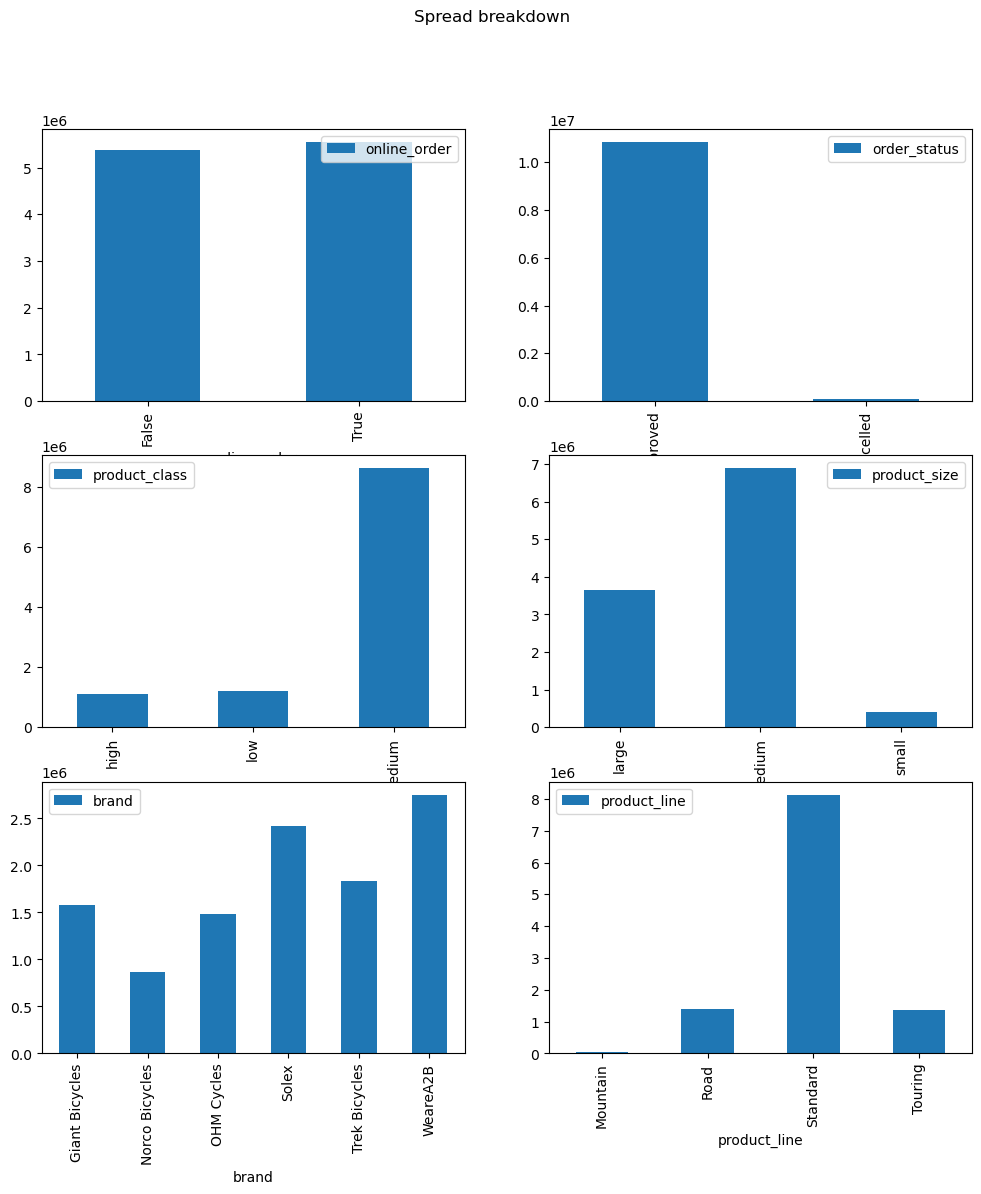

In [9]:
figure, ax = subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = ax.ravel().tolist()
for index, column in enumerate(['online_order', 'order_status', 'product_class', 'product_size', 'brand', 'product_line', ]):
    spread_df[[column, 'spread']].groupby([column, ])['spread'].sum().plot(ax=axes[index], kind='bar', legend=True)
    axes[index].legend([column])
figure.suptitle('Spread breakdown')

If we look at the sum of the spread this tells us in a somewhat granular way how we are making our money.

In [10]:
treemap(data_frame=spread_df[brand_line + ['spread']].groupby(by=brand_line).sum().reset_index(), path=brand_line, values='spread').show()

But if we break it down by the mean spread we see which products have higher spread per mean transaction.

In [11]:
treemap(data_frame=spread_df[brand_line + ['spread']].groupby(by=brand_line).mean().reset_index(), path=brand_line, values='spread').show()